### Importing Modules 

In [137]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

### Caricamento CSV

In [139]:

dataframe = pd.read_csv("../../Datasets/5000kdataset.csv")
dataframe


,is_malicious,658,613,2360,2359,930,637,623,642,2363,...,798,578,626,748,1,640,2375,32,834,sha
0,0,-0.627687,-0.153849,-0.159302,-0.305073,1.180057,-1.740405,-0.543140,1.104203,0.081096,...,-0.800433,0.603568,0.449330,-1.355435,0.848278,1.541706,-0.318327,0.094317,-1.658620,de73a9bcb3ffc55f1d37bf9f8da0e022e1970a44f9254a...
1,0,-0.627687,-0.167689,-0.159302,-0.305073,-0.450757,-1.740405,-0.543140,1.104203,0.149718,...,0.047541,-0.599213,-0.366497,-1.788291,0.305169,0.205739,0.290310,0.887302,0.065235,e3bc14677f03d60bf91d16464d448baad4388237ff1215...
2,0,-0.627687,0.026072,-0.085626,0.203913,-0.450757,0.574579,1.841145,-0.905631,-0.056149,...,0.138315,-0.106357,-1.091330,0.624708,-0.547571,0.205739,-0.318327,-0.261596,0.221430,4dc978768daec25a857ad32a8e309fc7df183ae7a2a120...
3,0,-2.075305,0.039912,-0.158266,0.207808,-0.450757,-1.740405,1.841145,-0.905631,0.012473,...,0.170951,-0.474218,0.433362,0.060092,1.113482,0.205739,-0.313191,1.313208,0.187103,bdf83f43da06d91c853f5845ebaa78083e278de6449d1f...
4,1,0.819931,-0.167689,-0.159302,-0.305073,1.180057,0.574579,-0.543140,-0.905631,-0.056149,...,0.068830,-0.438922,-1.091330,0.624708,-0.415233,0.205739,-0.318327,-0.359865,0.221430,a9a0b6c877900fc0a41b9b6f61df195268c6c43ebc74e1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,-0.627687,-0.167689,-0.159302,-0.305073,-0.450757,0.574579,-0.543140,-0.905631,-0.056149,...,0.171120,-0.054717,0.155665,0.624708,-0.546506,-1.130228,0.136225,-0.278293,0.203866,d6ccc02eaba5d915418a7db8f14843259259724e79e058...
4996,1,0.819931,-0.167689,-0.159302,-0.305073,1.180057,0.574579,-0.543140,-0.905631,-0.056149,...,0.171120,-0.283912,0.025407,0.624708,-0.190774,0.205739,-0.318327,-0.042344,0.221430,23bb75a33b976b0acf2e6cecefcd8ffb35fd51f6e57b8a...
4997,1,-0.627687,-0.167689,-0.159302,-0.305073,1.180057,0.574579,-0.543140,-0.905631,-0.056149,...,0.171120,-0.263195,-0.325180,0.624708,-0.412997,-1.130228,-0.318327,-0.208935,0.221430,6f513e6f4614ed95ab781582d3e6f9a149f0dbc606a5a3...
4998,0,0.819931,-0.167689,-0.159302,-0.305073,-0.450757,-1.740405,-0.543140,-0.905631,-0.056149,...,-2.532330,-0.843424,-0.616998,0.590904,-0.896852,0.205739,-0.318327,-0.549218,0.221430,c7cc07a293a437709745204fc7df12a0b92ddb7e08a0db...


#### Data Analisys

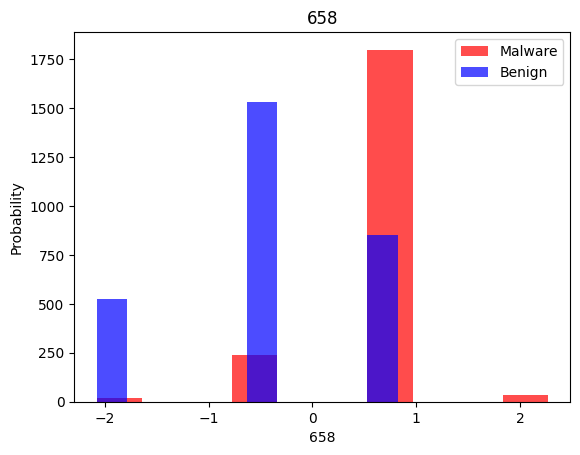

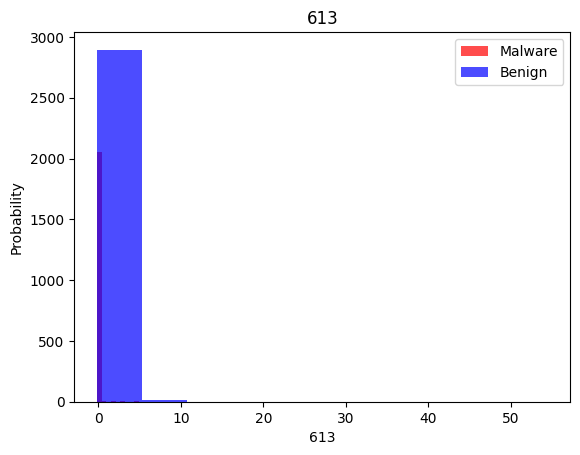

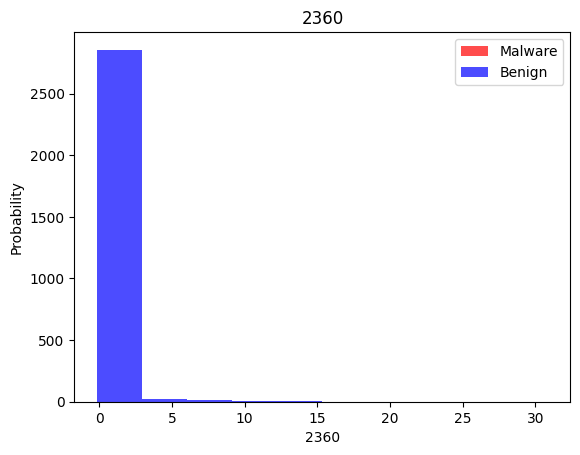

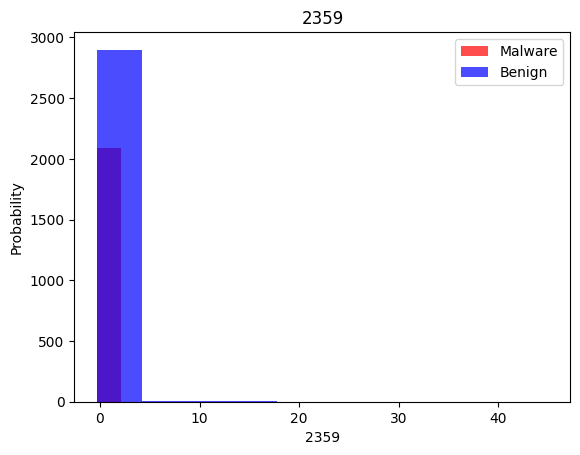

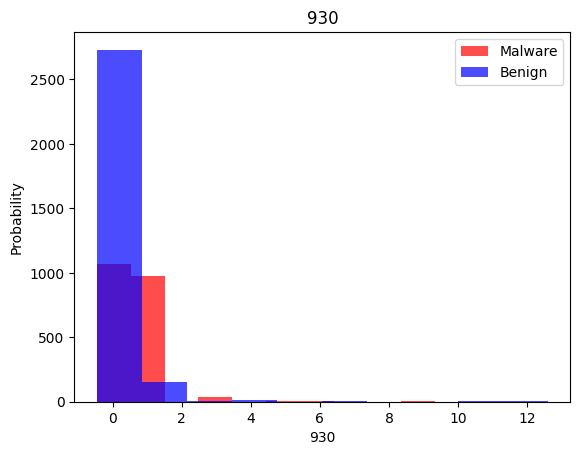

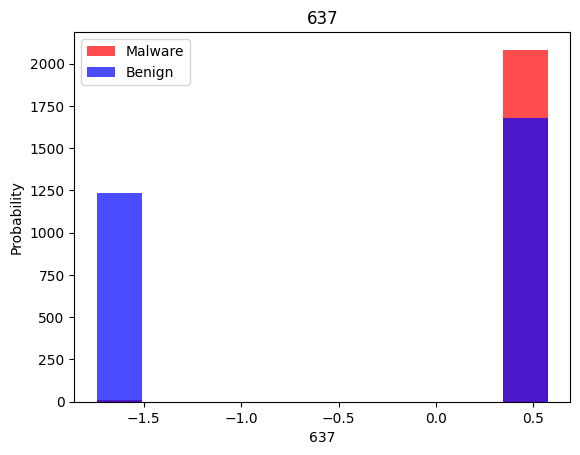

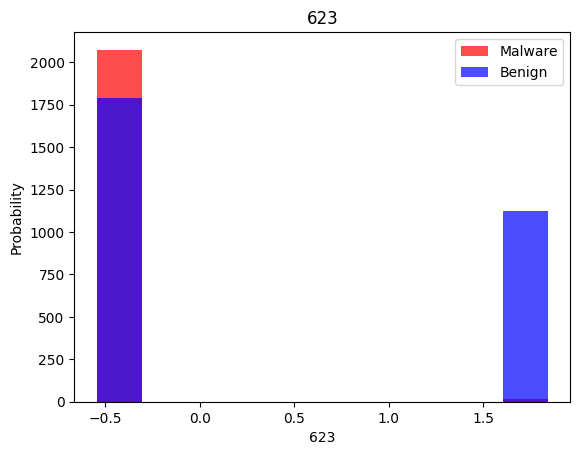

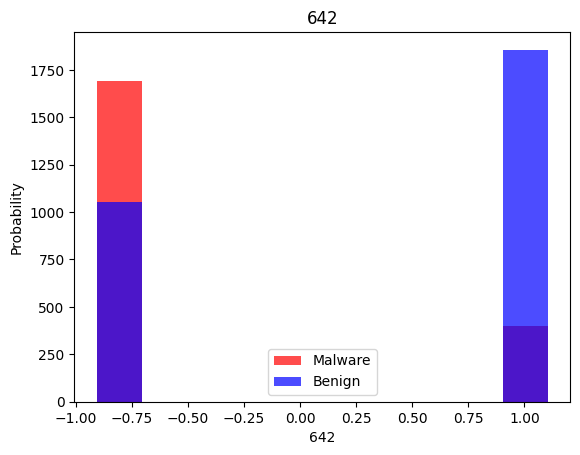

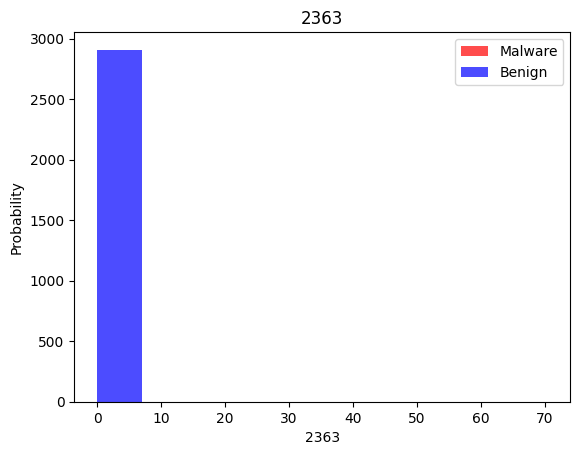

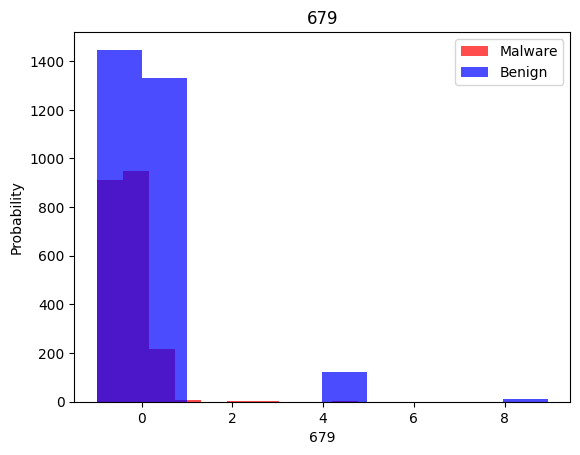

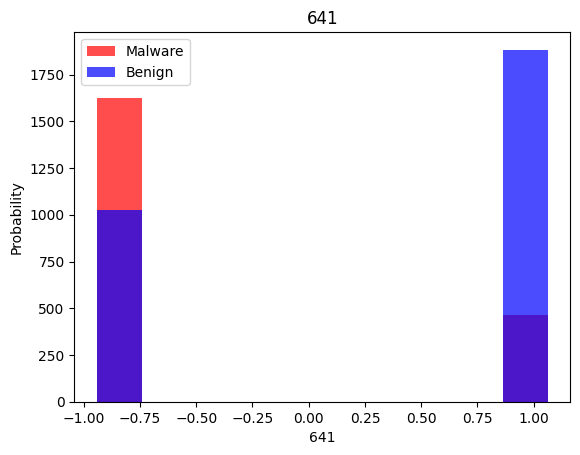

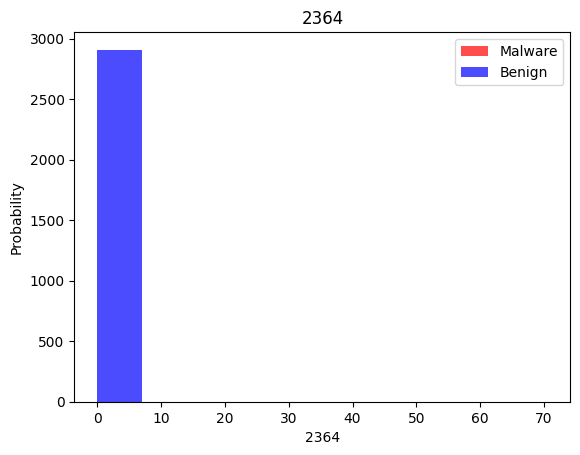

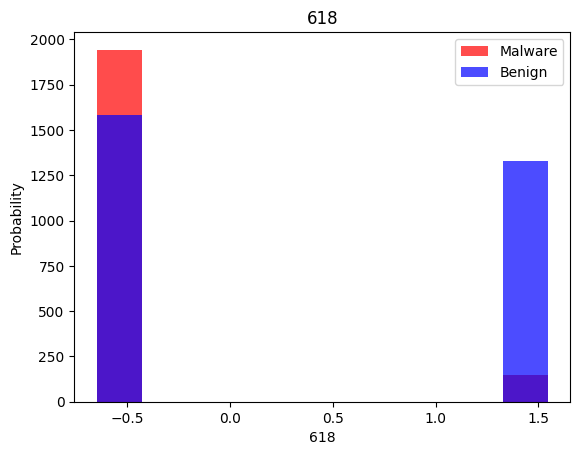

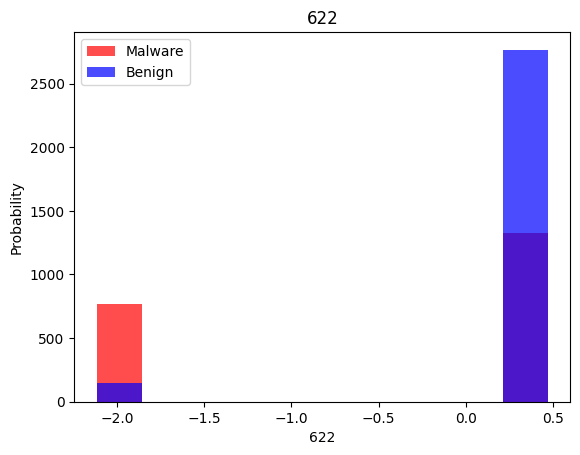

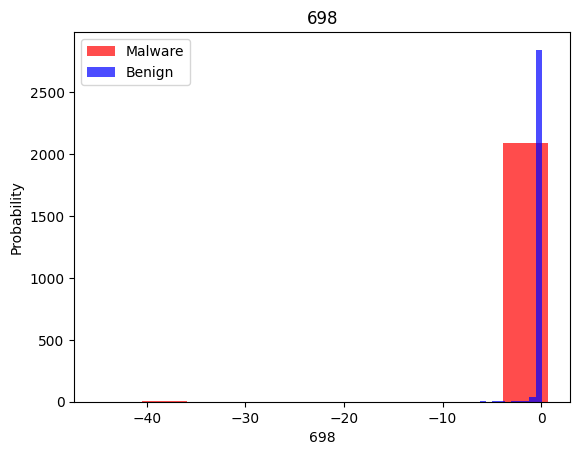

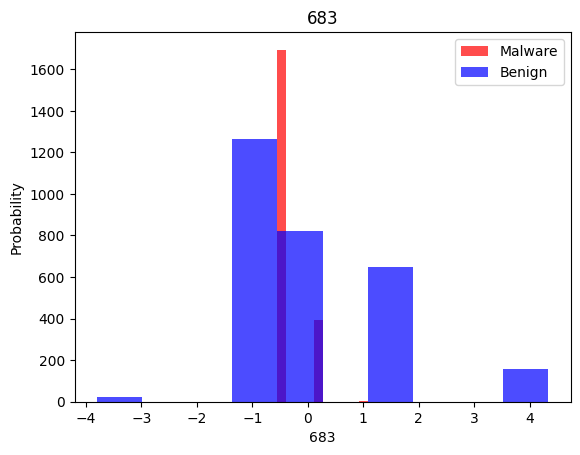

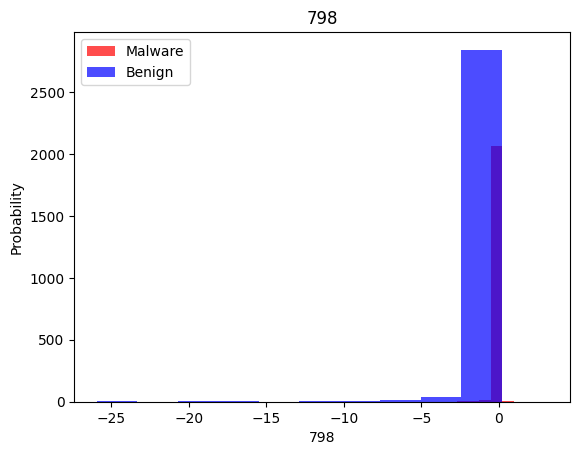

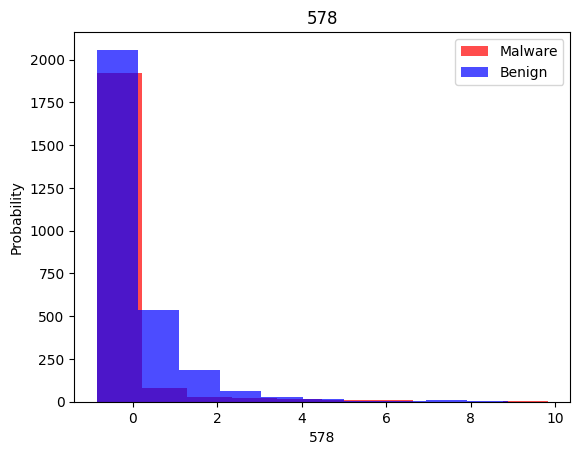

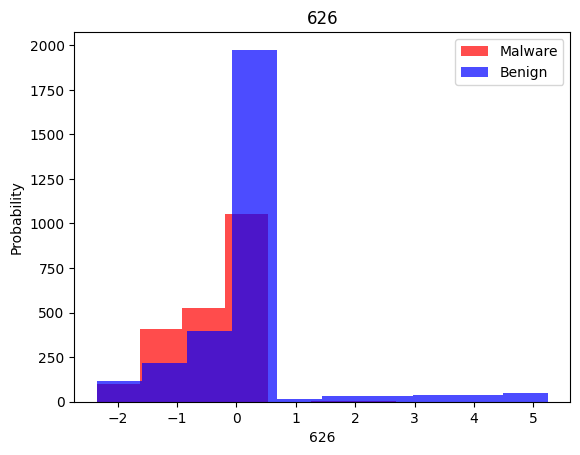

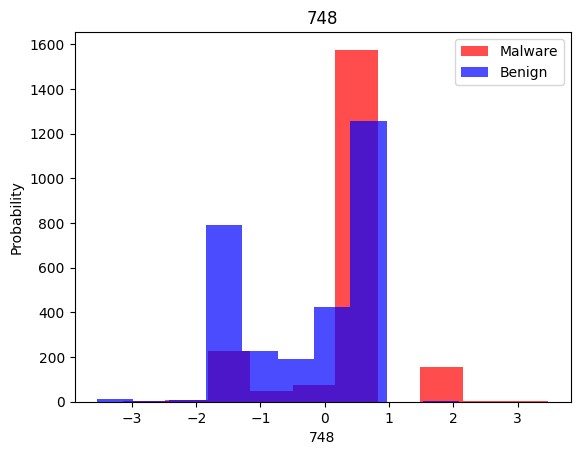

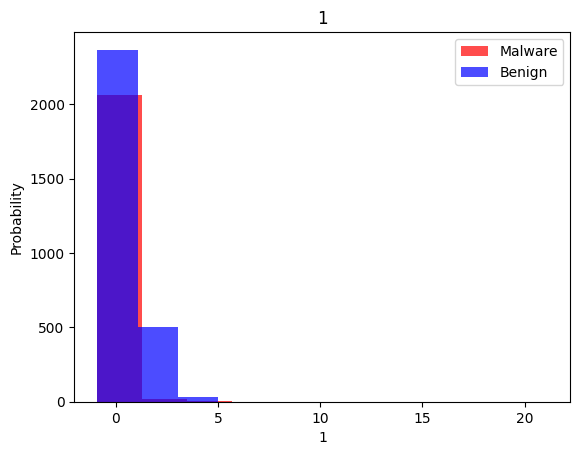

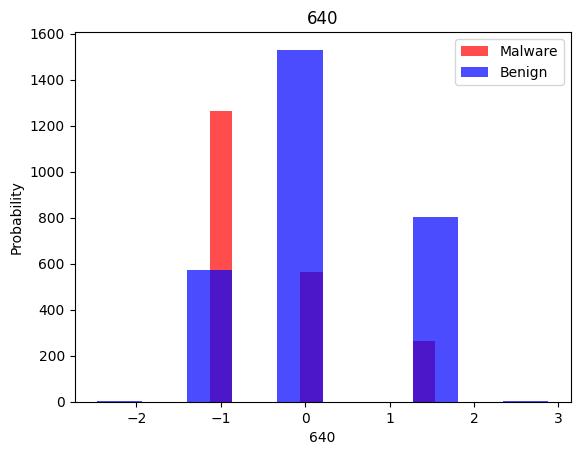

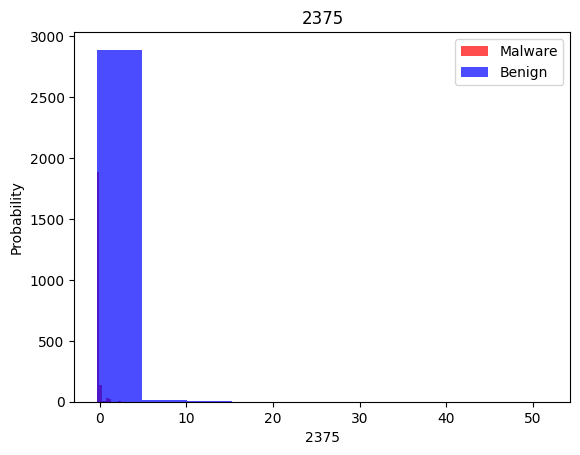

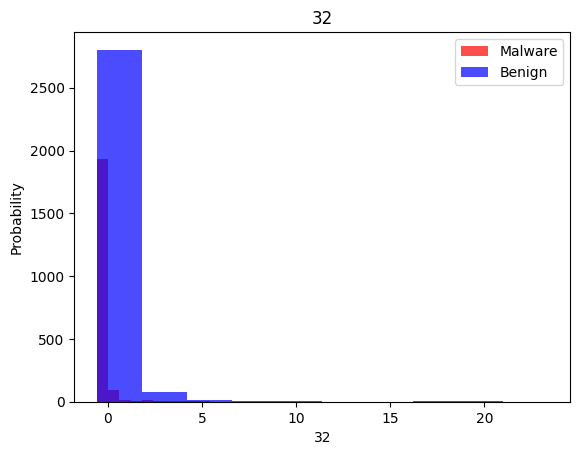

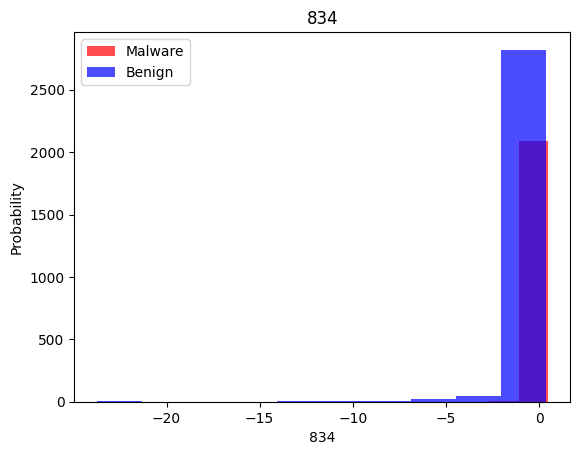

In [140]:
for feature in dataframe.columns[1:-1]:
    plt.hist(dataframe[dataframe["is_malicious"]==True][feature],color="red",label="Malware",alpha=0.7)
    plt.hist(dataframe[dataframe["is_malicious"]==False][feature],color="blue",label="Benign",alpha=0.7)
    plt.title(feature)
    plt.ylabel("Probability")
    plt.xlabel(feature)
    plt.legend()
    plt.show()

#### Dataset setup

In [141]:
X = dataframe.iloc[:,1:-1]
y = dataframe.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


#### Decision Trees

In [142]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
y_predicted = decision_tree_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))



              precision    recall  f1-score   support

           0       0.96      0.97      0.96       584
           1       0.95      0.95      0.95       416

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



#### Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train.values,y_train.values.ravel())
y_predicted = logistic_model.predict(X_test)


#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       547
           1       0.94      0.86      0.90       453

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



#### Neural Network

In [145]:
from sklearn.neural_network import MLPClassifier

neural_model = MLPClassifier()
neural_model.fit(X_train,y_train.values.ravel())
y_predicted = neural_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       576
           1       0.97      0.95      0.96       424

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



#### Support Vector Classifier

In [146]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train.values.ravel())
y_predicted = svc_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       578
           1       0.94      0.92      0.93       422

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



#### Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train.values.ravel())
y_predicted = rf_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       585
           1       0.98      0.98      0.98       415

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



#### Stacking

In [148]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("decision tees",decision_tree_model),
    ("neural network ",neural_model),
    ("logistic Eregression",logistic_model),
    ("random forest",rf_model),
    ("svc",svc_model),
    
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_model.fit(X_train,y_train.values.ravel())
y_predicted = stacking_model.predict(X_test)
print(classification_report(y_predicted, y_test))





              precision    recall  f1-score   support

           0       0.99      0.98      0.99       589
           1       0.98      0.98      0.98       411

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

